In [1]:
# Imports for Talos and Keras

import plaidml.keras
plaidml.keras.install_backend()

import talos as ta
from talos.utils import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.activations import relu, elu
from keras import regularizers
from keras import optimizers

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# load the sarcoma transcriptome data
sarcoma_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-zscore-no-label-nomfs.csv')
sarcoma_df.shape

(189, 20605)

In [4]:
# load label data
sarcoma_labels_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-labels-nomfs.csv')
sarcoma_labels_df.shape

(189, 1)

In [5]:
# Convert transcriptome df to np array
X = sarcoma_df.to_numpy()
print(X)

[[-0.51154087  0.09480786 -0.35176093 ...  0.51624723  0.02346097
   2.48359169]
 [-0.19129576  0.15347405  0.20261954 ... -0.41028013  2.86123234
   0.16777757]
 [ 0.26472818  2.327348   -0.56049386 ... -0.21651268  0.0192731
   0.76332633]
 ...
 [-0.2652622  -0.48026337 -1.16285933 ... -0.36779173  0.24949394
  -0.36985907]
 [ 0.24931652 -0.03363532 -0.97441342 ... -0.50605902 -1.23871739
   0.28153212]
 [-0.07085013 -0.29522455 -0.59015045 ... -0.50644652 -0.01137879
  -0.39862195]]


In [6]:
# Convert label df to np array
y_df = sarcoma_labels_df['label']
y = y_df.to_numpy()
print(y)

[4 2 2 5 3 2 4 4 3 4 4 4 3 0 3 4 2 4 4 0 2 4 3 3 3 2 0 4 4 5 3 3 2 4 4 5 4
 3 4 4 5 4 2 4 4 4 4 4 4 2 4 3 3 2 2 4 4 4 4 4 4 4 2 2 3 4 2 3 4 4 3 4 3 2
 4 3 2 3 4 4 3 4 3 4 3 4 4 3 4 4 4 0 4 3 4 3 3 3 5 2 0 3 3 4 2 3 0 3 4 2 4
 2 0 3 4 4 3 2 2 3 4 4 4 4 4 3 2 4 2 4 0 2 2 3 4 4 2 3 4 4 3 3 4 3 4 2 2 3
 2 2 0 4 2 4 2 4 3 3 4 2 4 2 4 3 4 2 3 4 2 4 4 2 2 3 4 4 4 3 2 4 2 3 0 3 3
 2 2 3 2]


In [7]:
y_cat = to_categorical(y)
print(y_cat)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [8]:
y_cat = np.delete(y_cat, np.s_[1:2], axis=1)   
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0.

In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2,
    stratify=y_cat, random_state=0
)

In [10]:
# define the hyper-parameters
p = {
    'learning_rate': [0.01, 0.005],
    'l1_reg': [0, 0.0001],
    'l2_reg': [0, 0.0001, 0.001],
    'dropout': [0, 0.2, 0.5]
}

In [11]:
# add input parameters to the function
def sarcoma(x_train, y_train, x_val, y_val, params):
    
    # replace the hyperparameter inputs with references to params dictionary 
    model = Sequential()
    model.add(Dense(5000, activation='relu', input_dim=20605))
    model.add(Dense(5000, kernel_regularizer=regularizers.l1_l2(params['l1_reg'],params['l2_reg']), activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(5000, kernel_regularizer=regularizers.l1_l2(params['l1_reg'],params['l2_reg']), activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(5, activation='softmax'))
    sgd = optimizers.SGD(lr=params['learning_rate'])
#   sgd = optimizers.SGD(lr=0.005)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # make sure history object is returned by model.fit()
    out = model.fit(x=x_train, 
                    y=y_train,
                    validation_data=[x_val, y_val],
                    epochs=10,
                    batch_size=32,
                    verbose=1)
    
    # modify the output model
    return out, model

In [12]:
t = ta.Scan(x=X_train, y=y_train, params=p, model=sarcoma, experiment_name='sarcoma-mlp', val_split=.2, fraction_limit=0.3)

  0%|          | 0/10 [00:00<?, ?it/s]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 4s 32ms/step - loss: 63.5990 - acc: 0.3500 - val_loss: 61.7268 - val_acc: 0.8387
Epoch 2/10
120/120 [==============================] - 2s 20ms/step - loss: 61.9211 - acc: 0.7500 - val_loss: 61.9906 - val_acc: 0.6129
Epoch 3/10
120/120 [==============================] - 2s 18ms/step - loss: 61.3895 - acc: 0.9500 - val_loss: 61.6448 - val_acc: 0.9032
Epoch 4/10
120/120 [==============================] - 2s 18ms/step - loss: 61.2814 - acc: 0.9833 - val_loss: 61.6057 - val_acc: 0.8710
Epoch 5/10
120/120 [==============================] - 2s 18ms/step - loss: 61.2060 - acc: 1.0000 - val_loss: 61.6504 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 2s 18ms/step - loss: 61.1822 - acc: 1.0000 - val_loss: 61.5555 - val_acc: 0.8710
Epoch 7/10
120/120 [==============================] - 2s 18ms/step - loss: 61.1650 - acc: 0.9917 - val_loss: 61.5950 - val_acc: 0.8710
Epoch 8/10

 10%|█         | 1/10 [00:25<03:51, 25.76s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 5s 45ms/step - loss: 63.8360 - acc: 0.4000 - val_loss: 63.1780 - val_acc: 0.5806
Epoch 2/10
120/120 [==============================] - 4s 32ms/step - loss: 62.6989 - acc: 0.8417 - val_loss: 62.9822 - val_acc: 0.7097
Epoch 3/10
120/120 [==============================] - 4s 29ms/step - loss: 62.4564 - acc: 0.9750 - val_loss: 62.9229 - val_acc: 0.8065
Epoch 4/10
120/120 [==============================] - 4s 29ms/step - loss: 62.3444 - acc: 1.0000 - val_loss: 62.8356 - val_acc: 0.8710
Epoch 5/10
120/120 [==============================] - 4s 29ms/step - loss: 62.3113 - acc: 1.0000 - val_loss: 62.8723 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 4s 29ms/step - loss: 62.2715 - acc: 1.0000 - val_loss: 62.8370 - val_acc: 0.8387
Epoch 7/10
120/120 [==============================] - 4s 29ms/step - loss: 62.2435 - acc: 1.0000 - val_loss: 62.8332 - val_acc: 0.8065
Epoch 8/10

 20%|██        | 2/10 [01:04<03:57, 29.73s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 3s 25ms/step - loss: 2.2269 - acc: 0.4917 - val_loss: 1.8561 - val_acc: 0.6129
Epoch 2/10
120/120 [==============================] - 2s 13ms/step - loss: 1.5333 - acc: 0.8417 - val_loss: 1.6581 - val_acc: 0.7097
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 1.2649 - acc: 0.9583 - val_loss: 1.5630 - val_acc: 0.8387
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 1.1442 - acc: 1.0000 - val_loss: 1.5628 - val_acc: 0.8387
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 1.1008 - acc: 1.0000 - val_loss: 1.5541 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 1.0827 - acc: 1.0000 - val_loss: 1.5723 - val_acc: 0.7742
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 1.0717 - acc: 1.0000 - val_loss: 1.5474 - val_acc: 0.8387
Epoch 8/10
120/120 [====

 30%|███       | 3/10 [01:23<03:05, 26.51s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 4s 33ms/step - loss: 64.6251 - acc: 0.3083 - val_loss: 62.2257 - val_acc: 0.7097
Epoch 2/10
120/120 [==============================] - 2s 20ms/step - loss: 61.5378 - acc: 0.9167 - val_loss: 61.6978 - val_acc: 0.8710
Epoch 3/10
120/120 [==============================] - 2s 17ms/step - loss: 61.2994 - acc: 1.0000 - val_loss: 61.7286 - val_acc: 0.8065
Epoch 4/10
120/120 [==============================] - 2s 17ms/step - loss: 61.2252 - acc: 1.0000 - val_loss: 61.6758 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 2s 17ms/step - loss: 61.1920 - acc: 1.0000 - val_loss: 61.6529 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 2s 17ms/step - loss: 61.1694 - acc: 1.0000 - val_loss: 61.6130 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 17ms/step - loss: 61.1434 - acc: 1.0000 - val_loss: 61.5973 - val_acc: 0.8065
Epoch 8/10

 40%|████      | 4/10 [01:48<02:36, 26.09s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 3s 24ms/step - loss: 1.6457 - acc: 0.4083 - val_loss: 0.7557 - val_acc: 0.7742
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.3182 - acc: 0.9417 - val_loss: 0.6684 - val_acc: 0.7742
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1579 - acc: 1.0000 - val_loss: 0.6566 - val_acc: 0.7742
Epoch 4/10
120/120 [==============================] - 1s 4ms/step - loss: 0.1022 - acc: 1.0000 - val_loss: 0.6016 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0759 - acc: 1.0000 - val_loss: 0.5773 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0603 - acc: 1.0000 - val_loss: 0.5699 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0499 - acc: 1.0000 - val_loss: 0.5634 - val_acc: 0.8065
Epoch 8/10
120/120 [==========

 50%|█████     | 5/10 [01:59<01:46, 21.34s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 6s 50ms/step - loss: 4.0722 - acc: 0.3417 - val_loss: 3.3766 - val_acc: 0.4194
Epoch 2/10
120/120 [==============================] - 2s 15ms/step - loss: 1.5015 - acc: 0.8417 - val_loss: 1.6990 - val_acc: 0.6774
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 1.1078 - acc: 0.9917 - val_loss: 1.6595 - val_acc: 0.7097
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 1.0538 - acc: 1.0000 - val_loss: 1.6106 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 1.0451 - acc: 1.0000 - val_loss: 1.5727 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 1.0393 - acc: 1.0000 - val_loss: 1.5628 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 1.0264 - acc: 1.0000 - val_loss: 1.5875 - val_acc: 0.8065
Epoch 8/10
120/120 [====

 60%|██████    | 6/10 [02:23<01:28, 22.17s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 5s 40ms/step - loss: 12.8842 - acc: 0.3333 - val_loss: 12.9201 - val_acc: 0.5806
Epoch 2/10
120/120 [==============================] - 2s 15ms/step - loss: 11.4344 - acc: 0.5833 - val_loss: 10.5807 - val_acc: 0.8065
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1598 - acc: 0.9750 - val_loss: 10.6526 - val_acc: 0.8387
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0958 - acc: 0.9833 - val_loss: 10.7179 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0741 - acc: 0.9833 - val_loss: 10.6226 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0404 - acc: 1.0000 - val_loss: 10.6042 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0307 - acc: 1.0000 - val_loss: 10.5677 - val_acc: 0.8387
Epoch 8/10

 70%|███████   | 7/10 [02:46<01:07, 22.38s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 4s 33ms/step - loss: 2.3311 - acc: 0.4417 - val_loss: 2.0629 - val_acc: 0.6452
Epoch 2/10
120/120 [==============================] - 2s 13ms/step - loss: 1.3842 - acc: 0.9333 - val_loss: 1.7424 - val_acc: 0.6452
Epoch 3/10
120/120 [==============================] - 2s 14ms/step - loss: 1.1650 - acc: 1.0000 - val_loss: 1.6175 - val_acc: 0.8710
Epoch 4/10
120/120 [==============================] - 2s 14ms/step - loss: 1.1106 - acc: 1.0000 - val_loss: 1.6519 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 2s 14ms/step - loss: 1.0822 - acc: 1.0000 - val_loss: 1.6127 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 2s 14ms/step - loss: 1.0652 - acc: 1.0000 - val_loss: 1.5896 - val_acc: 0.8387
Epoch 7/10
120/120 [==============================] - 2s 14ms/step - loss: 1.0540 - acc: 1.0000 - val_loss: 1.5909 - val_acc: 0.8387
Epoch 8/10
120/120 [====

 80%|████████  | 8/10 [03:08<00:44, 22.33s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 3s 28ms/step - loss: 11.9721 - acc: 0.3667 - val_loss: 11.8818 - val_acc: 0.2581
Epoch 2/10
120/120 [==============================] - 2s 14ms/step - loss: 10.6718 - acc: 0.8000 - val_loss: 10.5235 - val_acc: 0.8710
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0934 - acc: 0.9833 - val_loss: 10.6078 - val_acc: 0.8387
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0436 - acc: 1.0000 - val_loss: 10.5573 - val_acc: 0.8387
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0268 - acc: 1.0000 - val_loss: 10.5603 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0186 - acc: 1.0000 - val_loss: 10.5519 - val_acc: 0.8387
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0181 - acc: 1.0000 - val_loss: 10.5451 - val_acc: 0.8387
Epoch 8/10

 90%|█████████ | 9/10 [03:28<00:21, 21.81s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 3s 23ms/step - loss: 3.2684 - acc: 0.2917 - val_loss: 2.3322 - val_acc: 0.4516
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.5411 - acc: 0.8250 - val_loss: 0.6320 - val_acc: 0.7742
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0881 - acc: 0.9833 - val_loss: 0.6406 - val_acc: 0.8065
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0544 - acc: 1.0000 - val_loss: 0.6240 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0331 - acc: 1.0000 - val_loss: 0.6392 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0270 - acc: 1.0000 - val_loss: 0.6322 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0244 - acc: 1.0000 - val_loss: 0.6028 - val_acc: 0.8065
Epoch 8/10
120/120 [==========

100%|██████████| 10/10 [03:39<00:00, 21.91s/it]


In [13]:
bestmodel = t.best_model(metric='val_acc')

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


In [14]:
bestmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              103030000 
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25005     
Total params: 153,065,005
Trainable params: 153,065,005
Non-trainable params: 0
______________________________________________________________

In [15]:
t.data.sort_values('val_acc', ascending=False)

,round_epochs,val_loss,val_acc,loss,acc,dropout,l1_reg,l2_reg,learning_rate
0,10,61.460281,0.870968,61.094932,0.991667,0.5,0.0001,0.0000,0.010
1,10,62.744526,0.870968,62.189898,1.000000,0.2,0.0001,0.0001,0.005
5,10,1.557549,0.870968,1.017690,1.000000,0.2,0.0000,0.0001,0.010
2,10,1.537289,0.838710,1.041234,1.000000,0.2,0.0000,0.0001,0.005
6,10,10.590231,0.838710,10.008148,1.000000,0.5,0.0000,0.0010,0.010
7,10,1.583343,0.838710,1.035520,1.000000,0.0,0.0000,0.0001,0.005
8,10,10.548012,0.838710,10.000687,1.000000,0.2,0.0000,0.0010,0.010
3,10,61.549309,0.806452,61.073472,1.000000,0.2,0.0001,0.0000,0.010
4,10,0.556704,0.806452,0.033082,1.000000,0.0,0.0000,0.0000,0.005
9,10,0.609607,0.806452,0.016355,1.000000,0.2,0.0000,0.0000,0.010


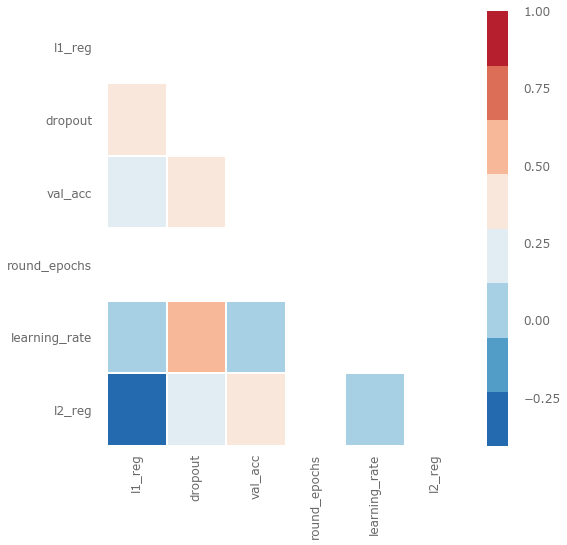

In [16]:
a = ta.Analyze(t)
a.plot_corr('val_acc', ['loss', 'acc', 'precision', 'recall', 'f1score',
                            'val_loss', 'val_acc', 'val_precision', 'val_recall'])

In [21]:
#  
sgd=optimizers.SGD(lr=0.01)
bestmodel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print("""test loss: %.2f
test accuracy: %.2f
""" % tuple(bestmodel.evaluate(X_test, y_test)))

38/38 [==============================] - 0s 10ms/step
test loss: 61.57
test accuracy: 0.79



In [22]:
predicted_classes = bestmodel.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(5)]
y_test_classes = np.argmax(y_test, axis=-1)
print(classification_report(y_test_classes, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67         2
     Class 1       0.50      0.44      0.47         9
     Class 2       0.71      1.00      0.83        10
     Class 3       1.00      0.75      0.86        16
     Class 4       0.00      0.00      0.00         1

    accuracy                           0.74        38
   macro avg       0.54      0.64      0.57        38
weighted avg       0.75      0.74      0.73        38



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_classes, predicted_classes)

array([[ 2,  0,  0,  0,  0],
       [ 2,  4,  3,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  3,  1, 12,  0],
       [ 0,  1,  0,  0,  0]])